### Fruit Recognition

Stefano Nicolis, Pietro Turco

### 1. Libraries import

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### 2. Dataset import

(2000, 14700)
(8000, 14700)


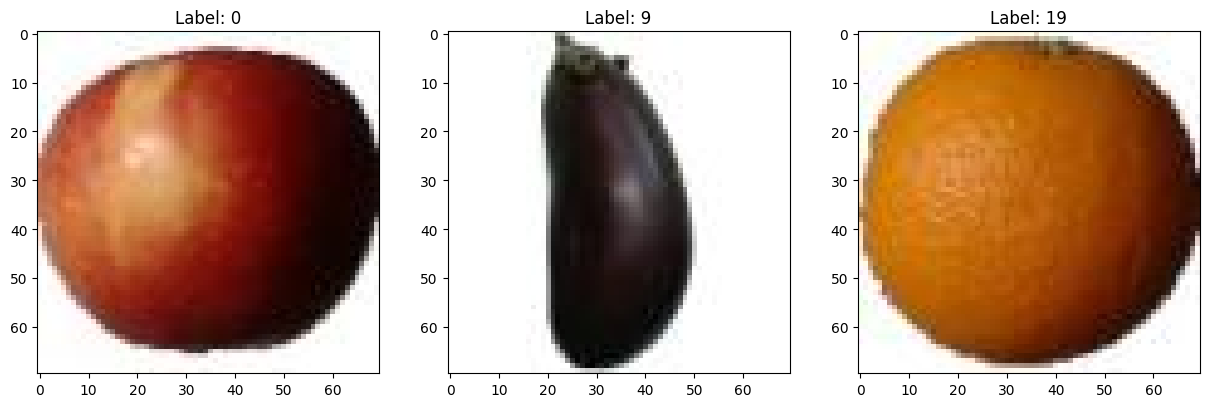

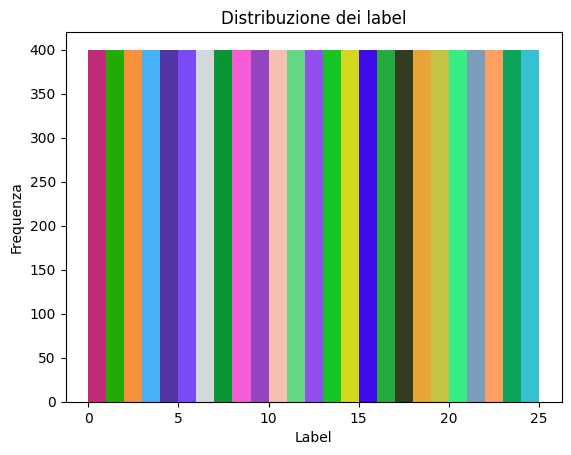

In [3]:
data_set_path = 'C:\\F_drive\\Ste\\UNIVERSITÀ\\Magistrale\\ML&AI\\images\\selected_datasets\\dataset.csv'

full_data = np.loadtxt(open(data_set_path, "rb"), delimiter = ",", dtype = int, skiprows = 0)
# Extract label column
full_labels = full_data[:, 0]
# Remove label column 
full_data = full_data[:,1:]

# Split dataset into training and test, 80%/20%
train_data, test_data, train_labels, test_labels = train_test_split(full_data, full_labels, test_size = 0.2)
print(test_data.shape)
print(train_data.shape)

# Plottare le immagini del primo, decimo e ventesimo label
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
for i, idx in enumerate([0, 9, 19]):
    # Estrarre l'immagine corrispondente al label
    image = full_data[full_labels == idx][0]
    # Ridimensionare l'immagine per visualizzarla correttamente
    image = image.reshape(70, 70, 3)
    # Plottare l'immagine
    axs[i].imshow(image)
    axs[i].set_title(f'Label: {idx}')
plt.show()

# Plottare l'istogramma della distribuzione dei label
n, bins, patches = plt.hist(full_labels, bins=range(26))
#Colorare ogni barra con un colore diverso
colors = np.random.rand(25, 3)
for i in range(25):
    patches[i].set_fc(colors[i])
plt.title('Distribuzione dei label')
plt.xlabel('Label')
plt.ylabel('Frequenza')
plt.show()

# Convert data and label from NumPy to PyTorch Tensor for CNN use
train_data_cnn = torch.from_numpy(train_data).float()
train_labels_cnn = torch.from_numpy(train_labels).long()
test_data_cnn = torch.from_numpy(test_data).float()
test_labels_cnn = torch.from_numpy(test_labels).long()

### PCA

In [4]:
# Test PCA variance with various values
pca_values = [7, 21, 70, 140] # Based on image dimension
print("Start test PCA")
for x in pca_values:
    pca = PCA(n_components = x)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    # Check the variances of the x selected components.
    X_train_var = np.var(train_data_pca)
    X_train_var = sum(pca.explained_variance_ratio_)
    print("Dataset after PCA with " + str(x) + " components: " + str(X_train_var))
print("End test PCA")

# PCA to be used from now on
COMPONENTS = 70
pca = PCA(n_components = COMPONENTS)
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)

# Check the variances of the selected components.
X_train_var = np.var(train_data_pca)
X_train_var = sum(pca.explained_variance_ratio_)

Start test PCA
Dataset after PCA with 7 components: 0.7150543332503897
Dataset after PCA with 21 components: 0.8578257987106872
Dataset after PCA with 70 components: 0.9376470559152923
Dataset after PCA with 140 components: 0.9638006119231642
End test PCA


### 3. KNN, no PCA

In [6]:
K = [5, 9, 13, 17, 19, 21]
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data, train_labels)
    result = knn.predict(test_data)

    print("KNN no PCA, " + "k = " + str(k))
    print("Accuracy:", accuracy_score(test_labels, result))
    print("Precision:", precision_score(test_labels, result, average = 'macro'))
    print("Recall:", recall_score(test_labels, result, average = 'macro'))
    print("=================")

KNN no PCA, manhattan metric, k = 5
Accuracy: 0.9985
Precision: 0.9984981684981684
Recall: 0.9986464646464646
KNN no PCA, manhattan metric, k = 9
Accuracy: 0.9985
Precision: 0.9984981684981684
Recall: 0.9986464646464646
KNN no PCA, manhattan metric, k = 13
Accuracy: 0.9945
Precision: 0.994390117668114
Recall: 0.9948136924803592
KNN no PCA, manhattan metric, k = 17
Accuracy: 0.992
Precision: 0.9919847053230825
Recall: 0.9924773868107201
KNN no PCA, manhattan metric, k = 19
Accuracy: 0.991
Precision: 0.9909575448292552
Recall: 0.9915439992106658
KNN no PCA, manhattan metric, k = 21
Accuracy: 0.9895
Precision: 0.9895235157337461
Recall: 0.9901904638571305


### 4. KNN, PCA

In [8]:
K = [5, 9, 13, 17, 19, 21]
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data_pca, train_labels)
    result = knn.predict(test_data_pca)

    print("KNN no PCA," + "k = " + str(k))
    print("Accuracy:", accuracy_score(test_labels, result))
    print("Precision:", precision_score(test_labels, result, average = 'macro'))
    print("Recall:", recall_score(test_labels, result, average = 'macro'))
    print("=================")

KNN no PCA,k = 5
Accuracy: 0.999
Precision: 0.999004329004329
Recall: 0.9991010101010102
KNN no PCA,k = 9
Accuracy: 0.9985
Precision: 0.9983889443889444
Recall: 0.9986071829405162
KNN no PCA,k = 13
Accuracy: 0.9965
Precision: 0.9961808079325754
Recall: 0.9966586540510591
KNN no PCA,k = 17
Accuracy: 0.9935
Precision: 0.9933342483814642
Recall: 0.9938779039369757
KNN no PCA,k = 19
Accuracy: 0.993
Precision: 0.9927074703196505
Recall: 0.9933739757663809
KNN no PCA,k = 21
Accuracy: 0.991
Precision: 0.9908525035296187
Recall: 0.9915314972572357


### 5. SVM

In [ ]:
KF = ['linear', 'poly', 'rbf', 'sigmoid']
for i in KF:
    svm_classifier = SVC(kernel = i, decision_function_shape = 'ovr')
    svm_classifier.fit(train_data, train_labels)
    svm_pred = svm_classifier.predict(test_data)

    print("SVM, " + i + " KERNEL")
    print("Accuracy:", accuracy_score(test_labels, svm_pred))
    print("Precision:", precision_score(test_labels, svm_pred, average = 'macro'))
    print("Recall:", recall_score(test_labels, svm_pred, average = 'macro'))
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels, svm_pred))
    disp.plot()
    plt.show()

### 6. SVM, PCA

SVM, linear KERNEL
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


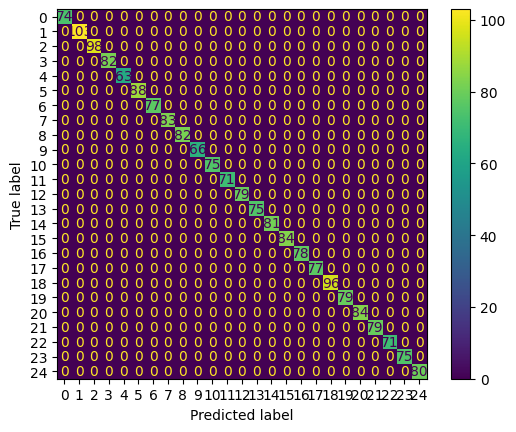

SVM, poly KERNEL
Accuracy: 0.994
Precision: 0.9944329004329004
Recall: 0.9941381555153707


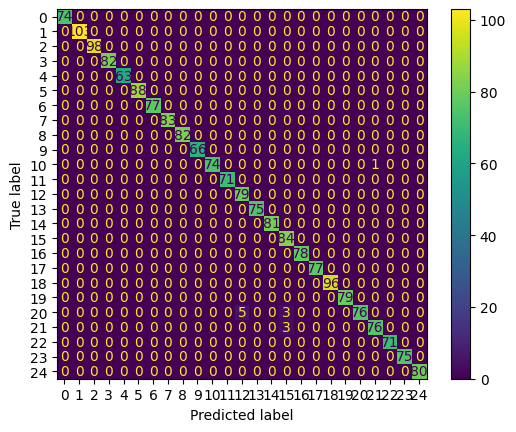

SVM, rbf KERNEL
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


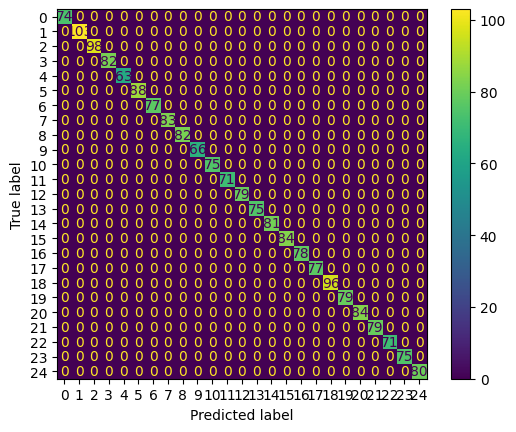

SVM, sigmoid KERNEL
Accuracy: 0.953
Precision: 0.9528142387643858
Recall: 0.9517546383916685


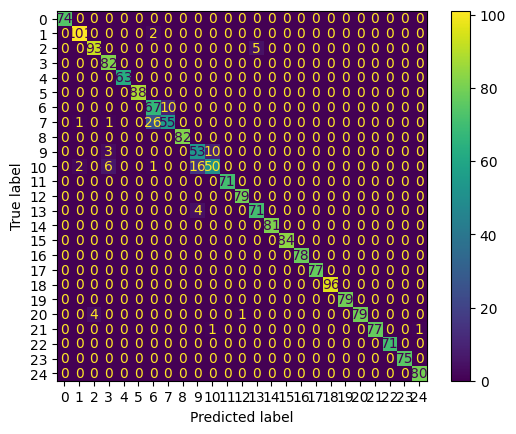

In [6]:
KF = ['linear', 'poly', 'rbf', 'sigmoid']
for i in KF:
    svm_classifier = SVC(kernel = i, decision_function_shape = 'ovr')
    svm_classifier.fit(train_data_pca, train_labels)
    svm_pred = svm_classifier.predict(test_data_pca)

    print("SVM, " + i + " KERNEL")
    print("Accuracy:", accuracy_score(test_labels, svm_pred))
    print("Precision:", precision_score(test_labels, svm_pred, average = 'macro'))
    print("Recall:", recall_score(test_labels, svm_pred, average = 'macro'))
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels, svm_pred))
    disp.plot()
    plt.show() 

### .7 CNN

In [7]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 16384, out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = num_classes)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the CNN model
model = CNN(num_classes = 25)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model for a number of epochs
num_epochs = 10
batch_size = 64
for epoch in range(num_epochs):
    # Shuffle the training data at the start of each epoch
    permutation = np.random.permutation(len(train_data_cnn))
    train_data_cnn = train_data_cnn[permutation]
    train_labels_cnn = train_labels_cnn[permutation]

    # Split the training data into batches
    num_batches = len(train_data_cnn) // batch_size
    for batch_idx in range(num_batches):
        # Select the current batch of data and labels
        start = batch_idx * batch_size
        end = start + batch_size
        full_data, target = train_data_cnn[start:end], train_labels_cnn[start:end]

        full_data = full_data.view(-1, 3, 70, 70)

        # Zero gradients
        optimizer.zero_grad()

        # Make a prediction with the model
        output = model(full_data)

        # Calculate loss
        loss = criterion(output, target)

        # Perform backpropagation to calculate gradients
        loss.backward()

        # Update model weights
        optimizer.step()

    # Evaluate the model on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        full_data, target = test_data_cnn, test_labels_cnn
        full_data = full_data.view(-1, 3, 70, 70)
        output = model(full_data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    print(f'Epoch: {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.2f}%')

Epoch: 1/10, Test Accuracy: 98.95%
Epoch: 2/10, Test Accuracy: 100.00%
Epoch: 3/10, Test Accuracy: 100.00%
Epoch: 4/10, Test Accuracy: 100.00%
Epoch: 5/10, Test Accuracy: 100.00%


KeyboardInterrupt: 